In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/IData

/content/drive/MyDrive/IData


In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import numpy as np
import pandas as pd
import seaborn as sns
from utils import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures


In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

## A. Data Exploration

### 1. Summarising Properties

In [128]:
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
df = pd.read_csv('Assignment3-WeatherData.csv', na_values=missing_values)
# Drop the specific columns: Location
# df = df.drop(['Location'], axis=1)
# df.set_index('ID', inplace=True)
print('Number of entries:', df.shape[0])
print('Number of attributes:', df.shape[1])

Number of entries: 51199
Number of attributes: 22


In [129]:
summary = stats_summary(df)
summary.round(2)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
MinTemp,50959.0,12.19,6.42,-8.5,7.60,12.0,16.9,33.9,41.18,9.30,0.02,-0.49,240,22,0.47,0.04
MaxTemp,51085.0,23.23,7.15,-4.1,17.90,22.6,28.3,47.3,51.10,10.40,0.23,-0.26,114,140,0.22,0.27
Rainfall,50667.0,2.32,8.14,0.0,0.00,0.0,0.8,268.6,66.19,0.80,8.90,135.20,532,9142,1.04,18.04
Evaporation,29227.0,5.45,4.08,0.0,2.60,4.8,7.4,72.2,16.68,4.80,3.04,24.36,21972,698,42.91,2.39
Sunshine,26720.0,7.63,3.78,0.0,4.90,8.5,10.6,14.5,14.29,5.70,-0.50,-0.83,24479,0,47.81,0.00
WindGustSpeed,47901.0,39.99,13.53,6.0,31.00,39.0,48.0,130.0,183.14,17.00,0.84,1.27,3298,1034,6.44,2.16
WindSpeed9am,50695.0,14.00,8.88,0.0,7.00,13.0,19.0,130.0,78.88,12.00,0.77,1.38,504,613,0.98,1.21
WindSpeed3pm,50199.0,18.63,8.77,0.0,13.00,19.0,24.0,83.0,76.99,11.00,0.61,0.69,1000,857,1.95,1.71
Humidity9am,50531.0,68.84,19.02,1.0,57.00,70.0,83.0,100.0,361.92,26.00,-0.48,-0.03,668,515,1.30,1.02
Humidity3pm,49840.0,51.49,20.83,0.0,37.00,52.0,66.0,100.0,433.97,29.00,0.03,-0.52,1359,0,2.65,0.00


In [130]:
# List of categorical_columns columns to impute with mode
# find categorical_columns variables

categorical_columns = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical_columns variables\n'.format(len(categorical_columns)))

print('The categorical_columns variables are :', categorical_columns)



There are 5 categorical_columns variables

The categorical_columns variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [131]:
# Find numerical variables, excluding the target variable 'RainTomorrow'
numerical = [var for var in df.columns if df[var].dtype != 'O' and var != 'RainTomorrow']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are:', numerical)


There are 16 numerical variables

The numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [132]:
X = df.drop(['RainTomorrow'], axis=1) # Set X to all columns except the target
Y = df['RainTomorrow'] # Set Y to the target column
sp_type_counts = Y.value_counts()
print(f'{X.shape[1]} features and 1 target column:\n{X.columns}')

21 features and 1 target column:
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')


In [16]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes


### 2. Distribution Visualization

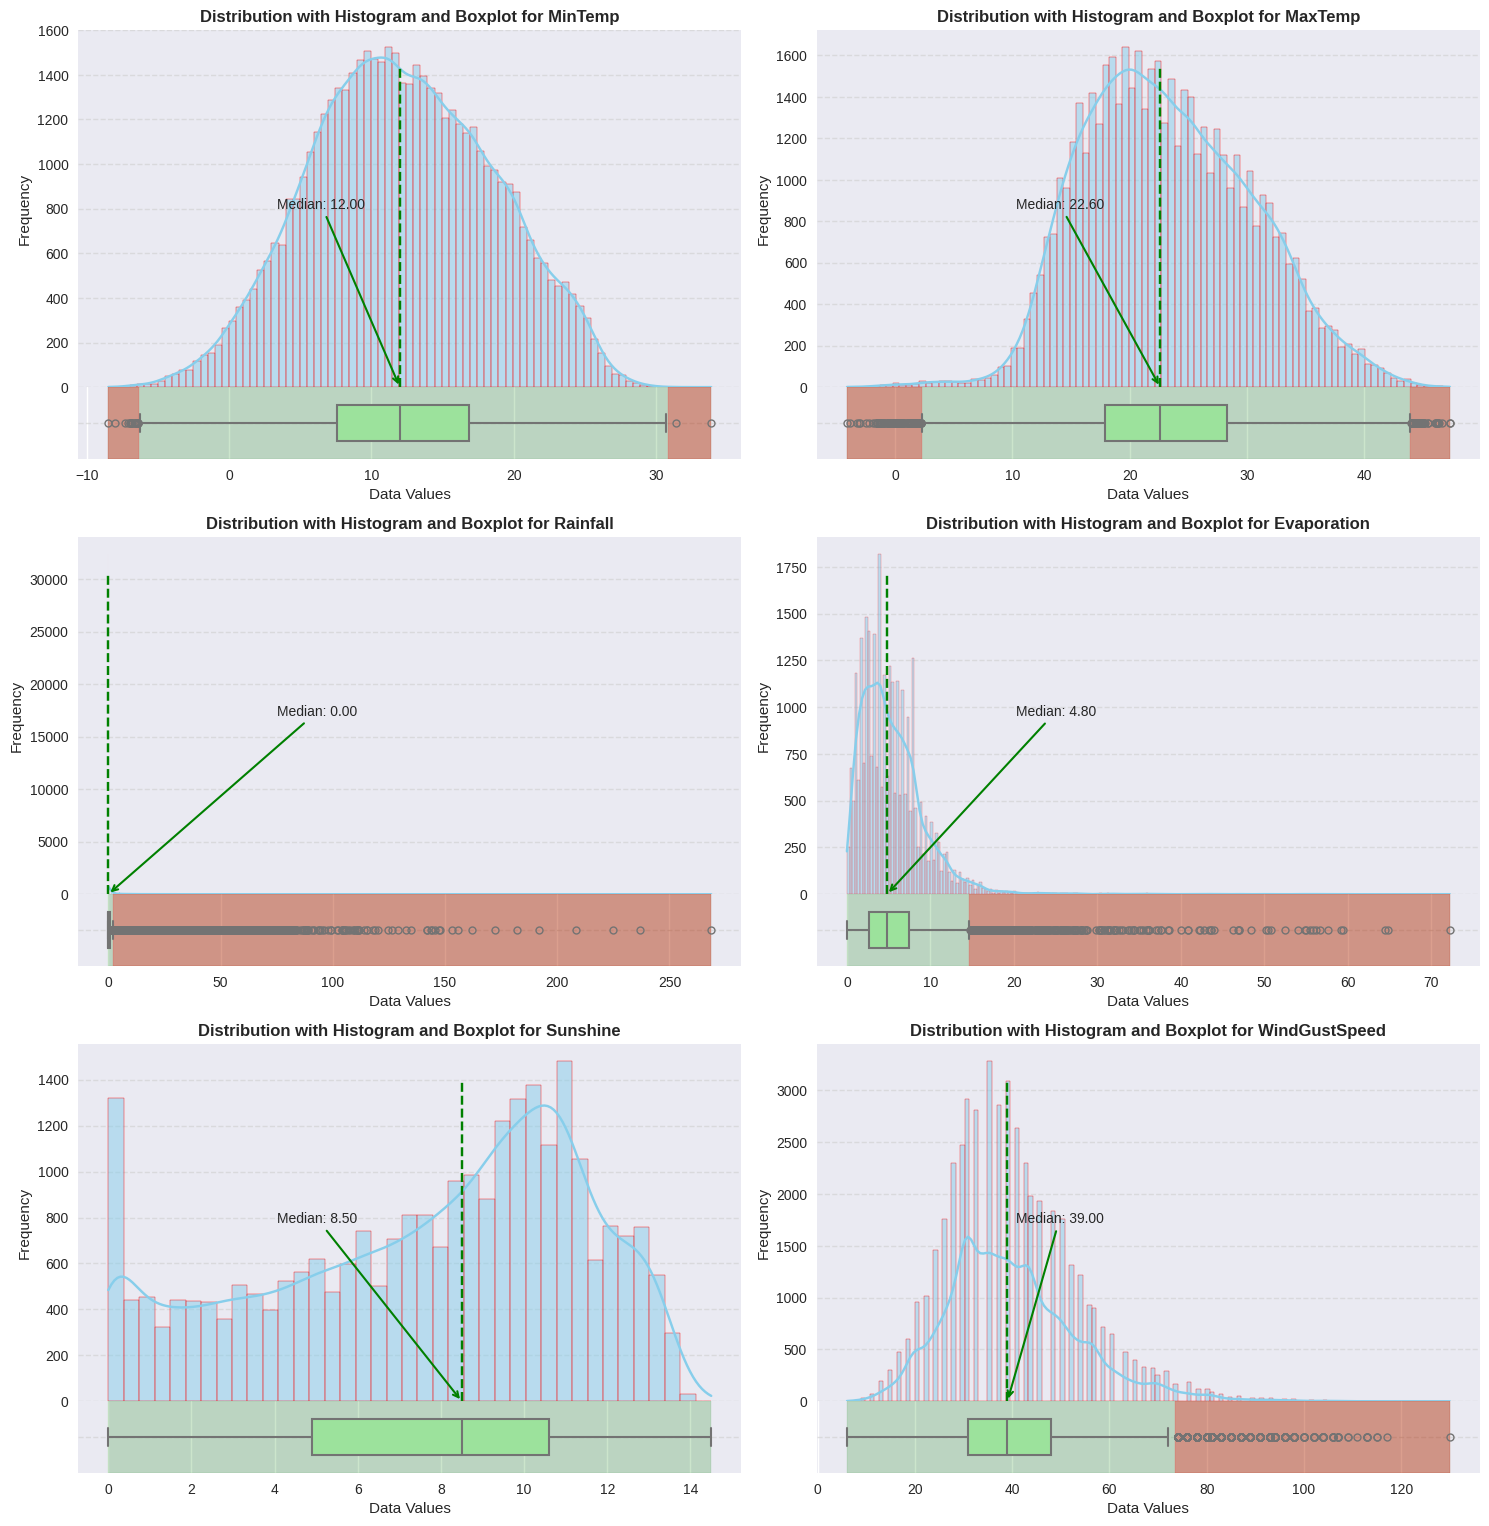

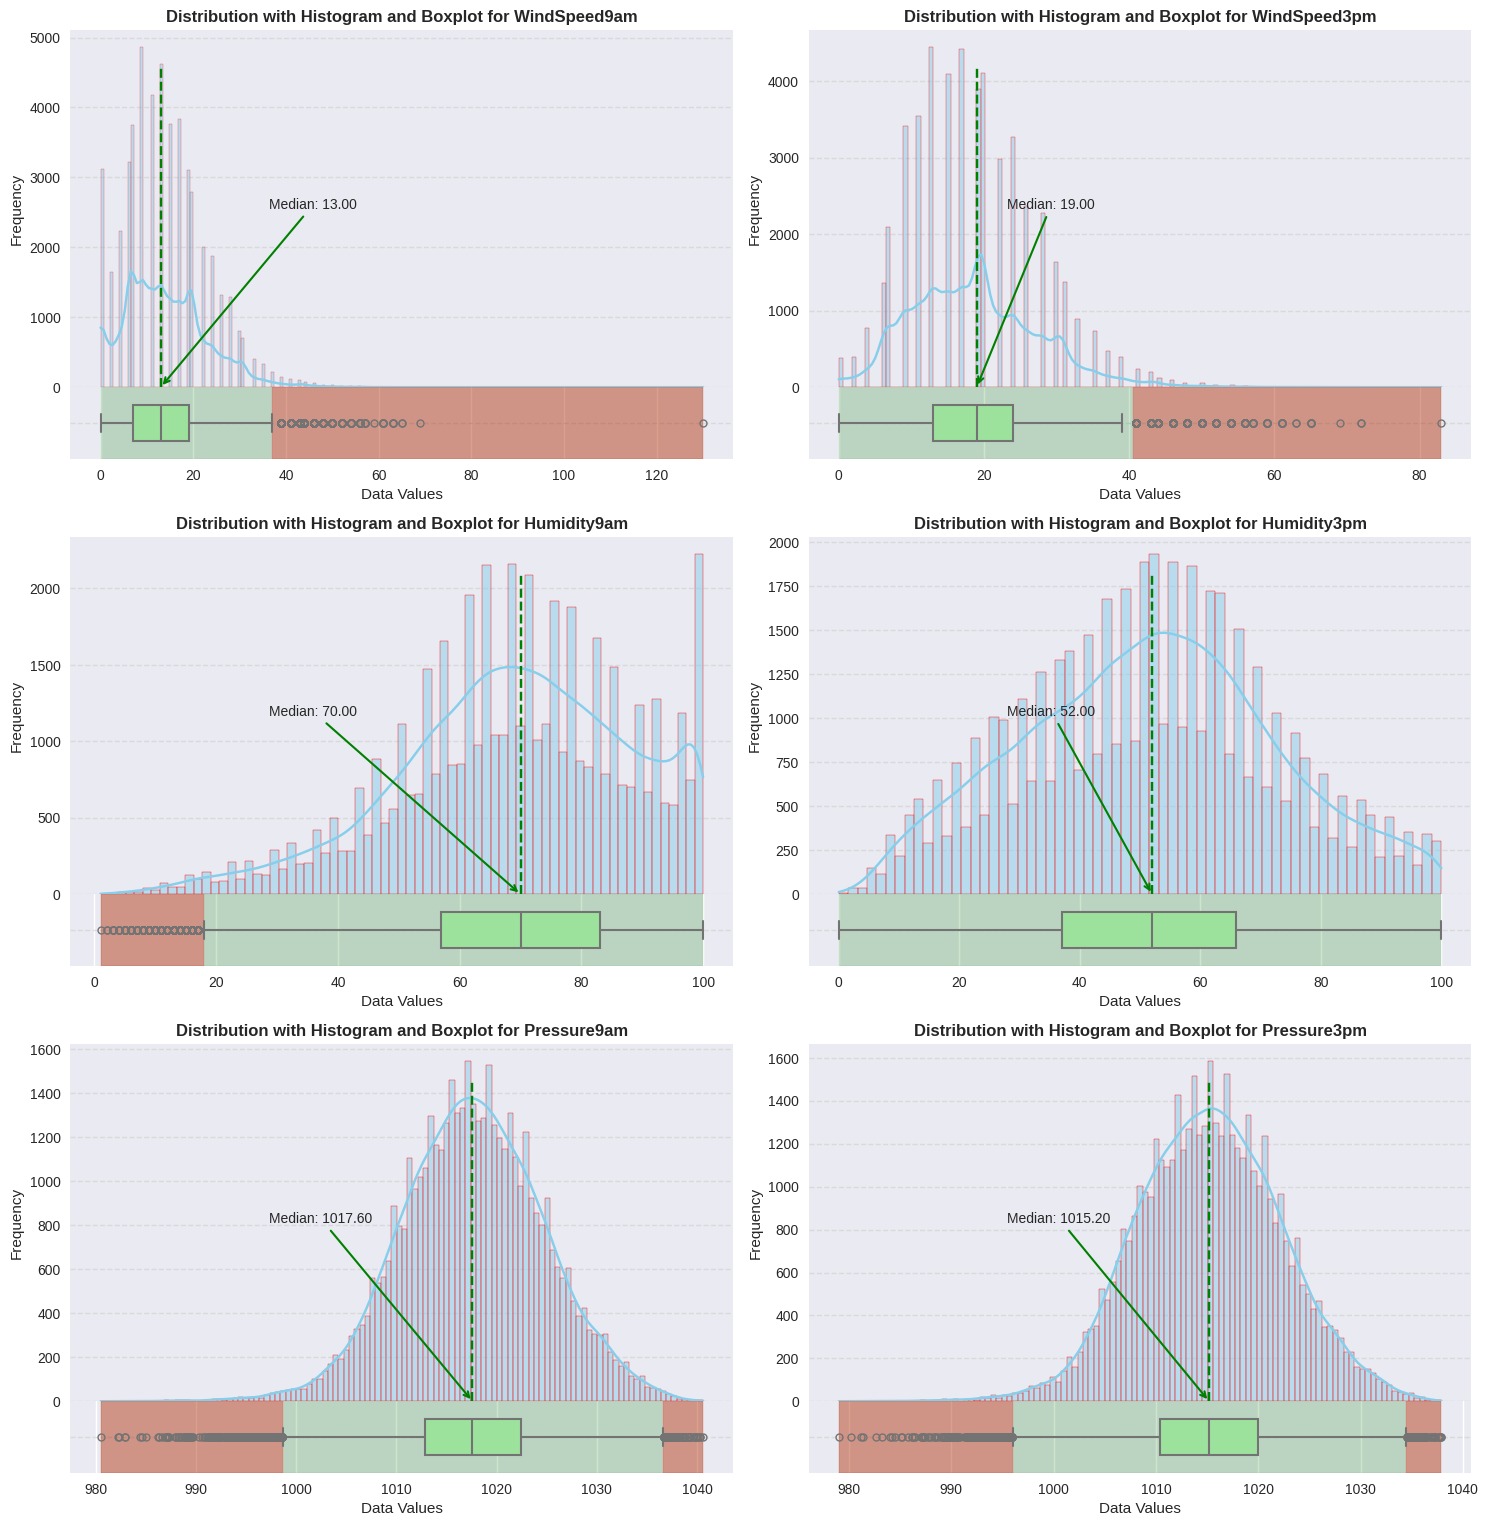

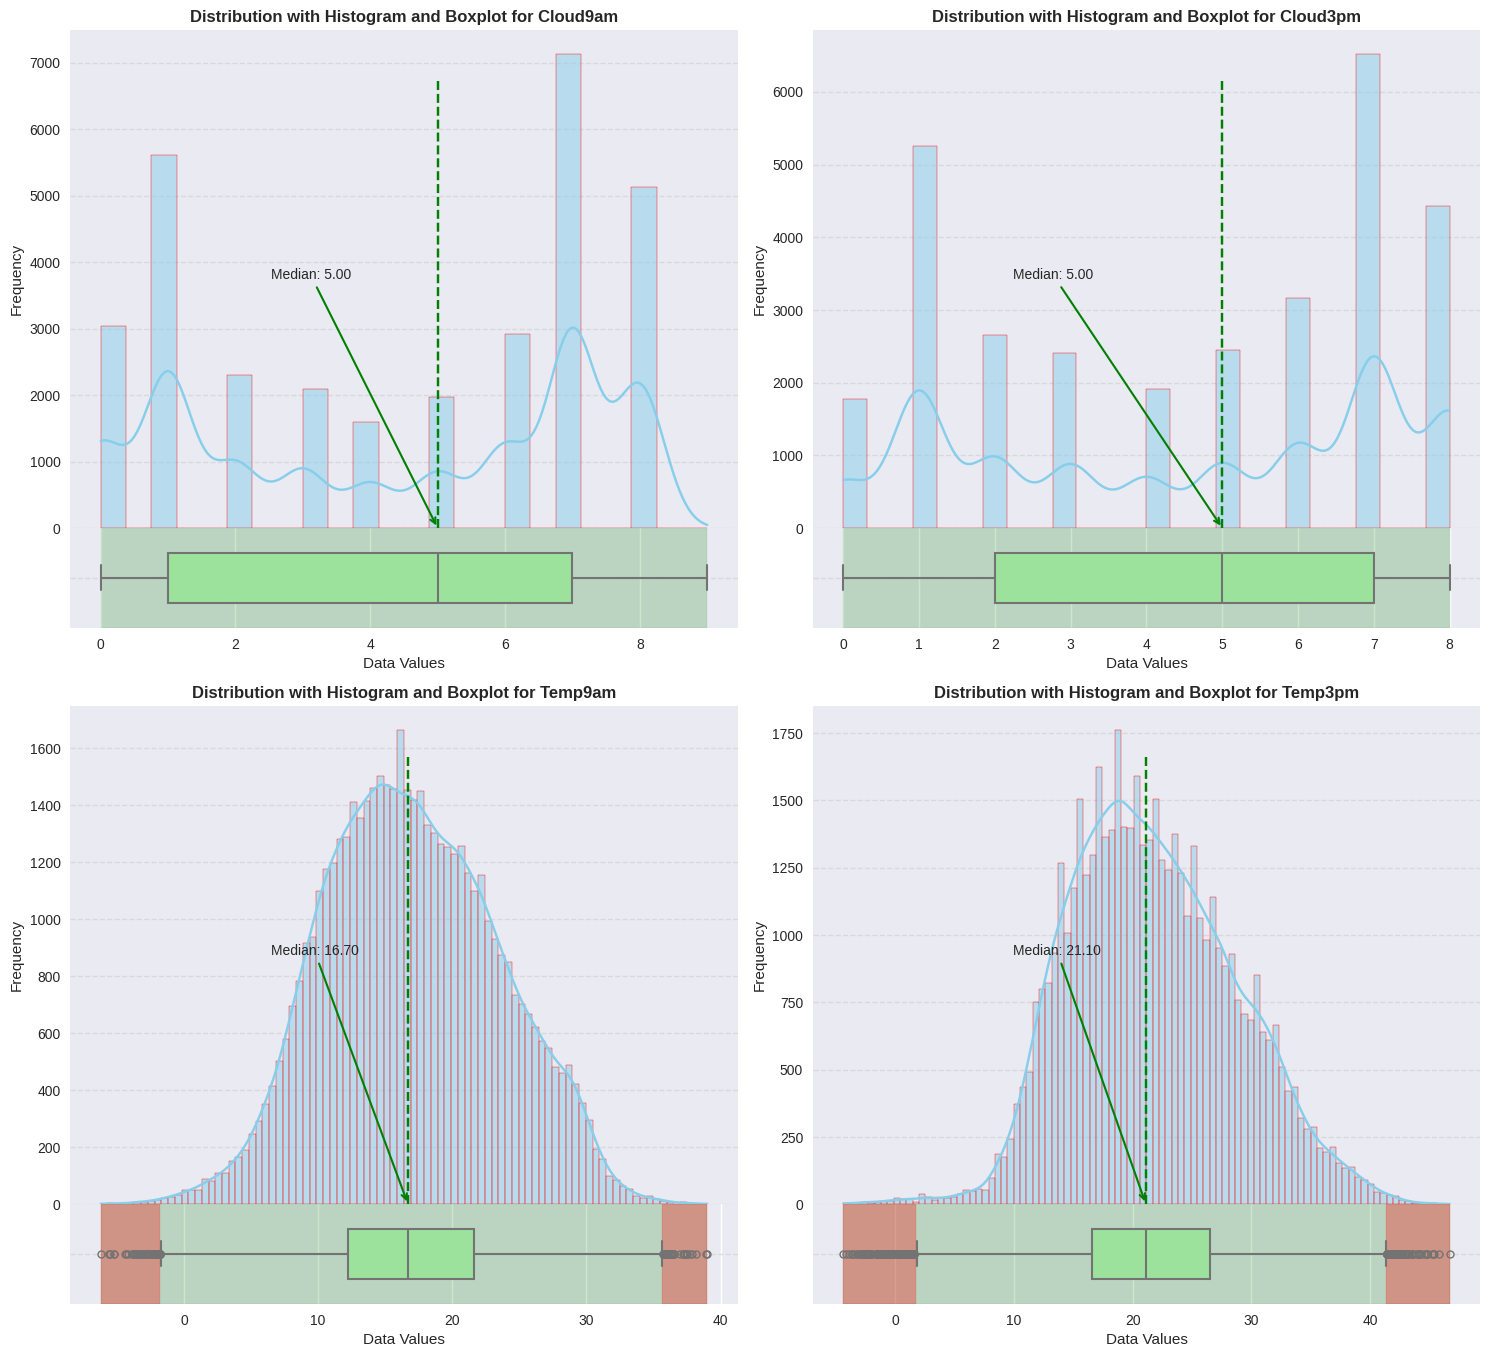

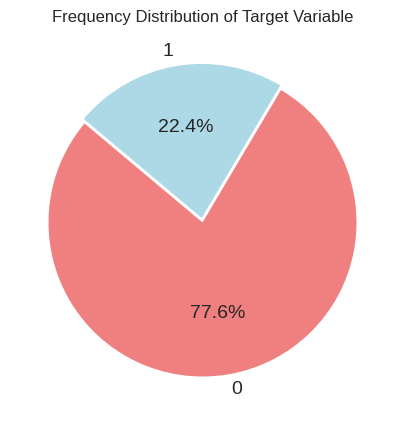

In [19]:
for i in range(0, len(numerical), 6):
    hist_box_plot((15, 20), X, numerical[i:i+6], ncols=2)

# Separate plot for the target column 'Y' as a pie chart
fig, outer_grid = hist_box_plot((15, 5), X, [], ncols=2, plt_show=False)
ax2 = fig.add_subplot(outer_grid[-1])
ax2.pie(  # Draw a pie chart for the target column
    sp_type_counts,
    labels=sp_type_counts.index,
    colors=['lightcoral', 'lightblue'],
    explode=(0, 0.03),
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 14}
)
ax2.set_title('Frequency Distribution of Target Variable')
plt.show()


### 3. Relationship Exploration
- Multiple attributes relationship of your dataset.
- Clusters of similar instances, "interesting" attributes and specific values of those attributes.
- Note that you may need to 'temporarily' recode attributes to numeric or from numeric to nominal.

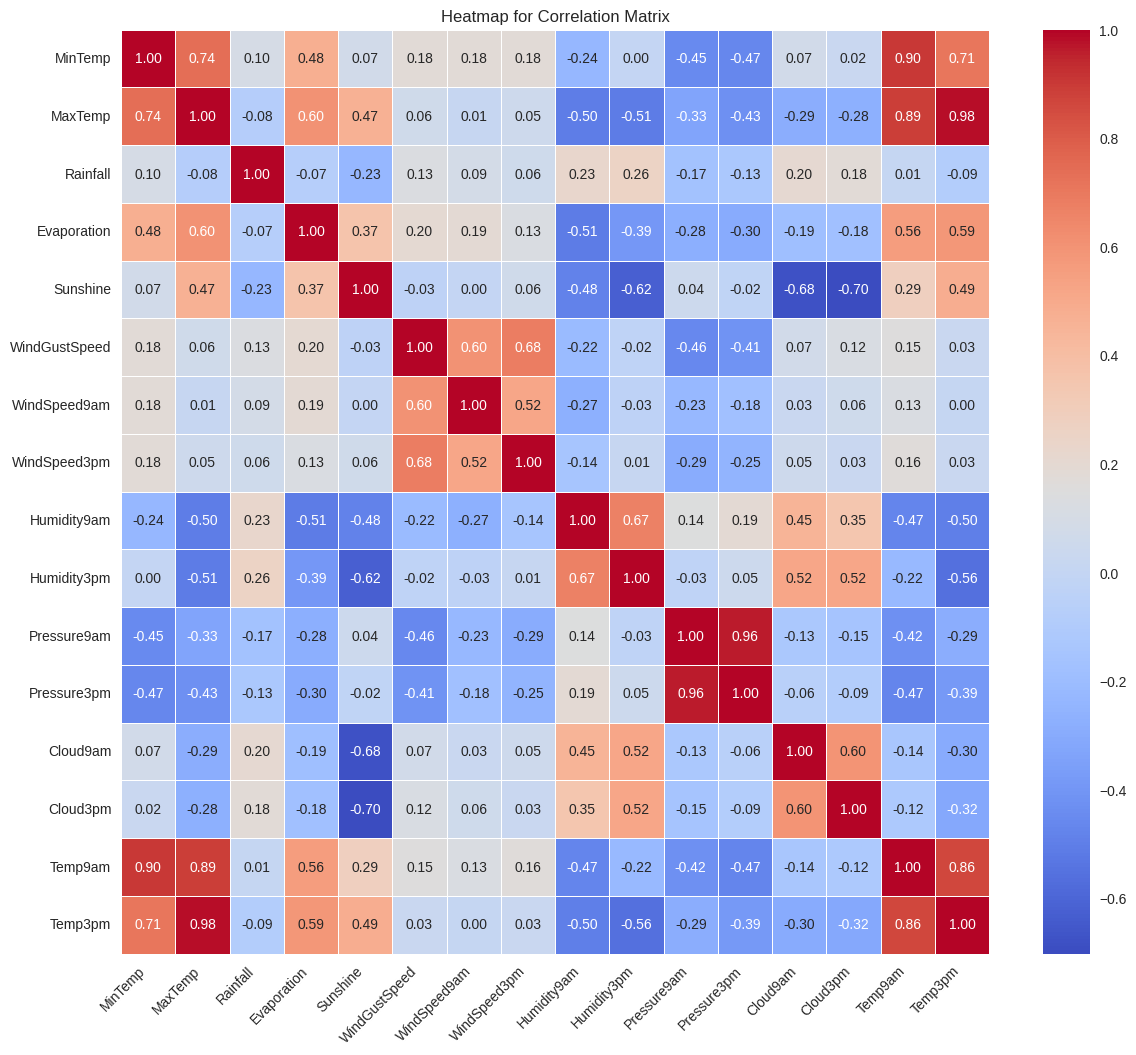

In [25]:
corr_matrix = X.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45, ha="right")
plt.title('Heatmap for Correlation Matrix')
plt.show()

## B. Data Preprocessing

In [26]:
pd.value_counts(Y)

,count
RainTomorrow,
0,39728
1,11471


### 1. Data Splitting

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)
Y_cnts = pd.value_counts(Y).to_list()
y_train_cnts = pd.value_counts(y_train).to_list()
y_test_cnts = pd.value_counts(y_test).to_list()

# Display the sizes of each split
split_summary = {
    "Dataset": ["X_train", "X_test", "y_train", "y_test"],
    "Size": [X_train.shape, X_test.shape, y_train.shape, y_test.shape],
    "Proportion": ["90%", "10%", "90%", "10%"]
}

split_summary_df = pd.DataFrame(split_summary)
print(split_summary_df)

   Dataset         Size Proportion
0  X_train  (46079, 21)        90%
1   X_test   (5120, 21)        10%
2  y_train     (46079,)        90%
3   y_test      (5120,)        10%


### 2. Handling Missing Values

In [134]:
# Checking columns with missing values
summary[['nulls_count', 'nulls_percent']]\
    [summary.nulls_count > 0].sort_values('nulls_count', ascending=False)

,nulls_count,nulls_percent
Sunshine,24479,47.811481
Evaporation,21972,42.914901
Cloud3pm,20648,40.328913
Cloud9am,19404,37.899178
Pressure3pm,5063,9.888865
Pressure9am,5061,9.884959
WindGustSpeed,3298,6.441532
Humidity3pm,1359,2.654349
Temp3pm,1038,2.027383
WindSpeed3pm,1000,1.953163


In [135]:
# Impute missing values in each specified column with its mode
for col in categorical_columns:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_train[col].mode()[0], inplace=True)

In [136]:
from sklearn.experimental import enable_iterative_imputer  # Enables IterativeImputer in sklearn
from sklearn.impute import IterativeImputer

# Set up the IterativeImputer for multiple imputation by chained equations
mice_imputer = IterativeImputer(random_state=42)

# Impute only numerical columns in X_train using IterativeImputer
X_train[numerical] = mice_imputer.fit_transform(X_train[numerical])
X_test[numerical] = mice_imputer.transform(X_test[numerical])

# Check for any remaining missing values in X_train
print("Missing values in X_train after imputation:", X_train.isnull().sum().sum())
# Verify imputation by checking for any remaining missing values
print("Missing values in X_test after imputation:", X_train.isnull().sum().sum())


Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


In [137]:
# from imblearn.over_sampling import SMOTENC

# # Initialize SMOTE-NC with categorical feature indices
# smote_nc = SMOTENC(categorical_features=categorical_columns, random_state=42)

# # Apply SMOTE-NC to resample the data
# X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)
from sklearn.utils import resample

# Separate majority and minority classes
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]
X_majority = X_train[y_train == 0]
y_majority = y_train[y_train == 0]

# Upsample minority class using bootstrapping
X_minority_upsampled, y_minority_upsampled = resample(X_minority, y_minority,
                                                      replace=True,
                                                      n_samples=len(X_majority),
                                                      random_state=42)

# Combine the upsampled data with the majority class
X_train_smote = pd.concat([X_majority, X_minority_upsampled])
y_train_smote = pd.concat([y_majority, y_minority_upsampled])


In [138]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    X_train_smote[col] = label_encoder.fit_transform(X_train_smote[col])
    X_test[col] = label_encoder.transform(X_test[col])
# Verify the result
print("Columns after label encoding:\n", X_train_smote.columns)
print("\nSample of the label encoded data:\n", X_train_smote.head())


Columns after label encoding:
 Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

Sample of the label encoded data:
        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
12892        42     14.1     28.5       0.0          7.8   4.40000   
45627        15      8.1     14.2       0.4          1.6   7.70000   
37003        28     11.4     28.8       0.0          8.0  12.50000   
27792        44     18.7     35.9       0.0         10.0   6.10000   
16674         9      8.3     24.4       0.0          2.0  12.04519   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
12892            0           52.0           9           5  ...           9.0   
45627     

### 3. Handling Outliers

In [139]:
# # X_train = pd.read_csv('X_train_imputed_smote.csv')
# # X_test = pd.read_csv('X_test_imputed.csv')

# Apply winsorizing to cap outliers within the 5th and 95th percentiles for selected columns
X_train_smote, outliers_summary = winsorize_outliers(X_train_smote, limits=[0.05, 0.05])
X_test, _ = winsorize_outliers(X_test, limits=[0.05, 0.05])
outliers_summary

,outliers_count_before,outliers_percent_before,outliers_count_after,outliers_percent_after
Rainfall,11079,15.492938,11075,15.487344
MinTemp,47,0.065725,0,0.000000
MaxTemp,256,0.357992,0,0.000000
Evaporation,1740,2.433226,0,0.000000
WindGustSpeed,1244,1.739617,0,0.000000
WindSpeed9am,912,1.275346,0,0.000000
WindSpeed3pm,1580,2.209481,0,0.000000
Humidity9am,865,1.209621,0,0.000000
Humidity3pm,3,0.004195,0,0.000000
Pressure9am,1173,1.640330,0,0.000000


### 5. Feature Scaling

In [140]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# List of columns to exclude from scaling
robust_cols = outliers_summary[
    (outliers_summary.outliers_count_after > 0)  # Only columns with outliers
].index.difference(categorical_columns).tolist()

# Filter standard_cols to include only numeric columns that exist in X_train_smote
standard_cols = [col for col in numerical if col in X_train_smote.columns and col not in categorical_columns]

print('Standard columns for scaling:', standard_cols)

# Apply RobustScaler to columns with outliers
robust_scaler = RobustScaler()
X_train_smote[robust_cols] = robust_scaler.fit_transform(X_train_smote[robust_cols])
X_test[robust_cols] = robust_scaler.transform(X_test[robust_cols])

# Apply StandardScaler to the remaining numerical columns
standard_scaler = StandardScaler()
X_train_smote[standard_cols] = standard_scaler.fit_transform(X_train_smote[standard_cols])
X_test[standard_cols] = standard_scaler.transform(X_test[standard_cols])

# Display a summary of the processed data
stats_summary(X_train_smote).round(2)


Standard columns for scaling: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
Location,71510.0,23.80,14.20,0.00,11.00,24.00,36.00,48.00,201.53,25.00,0.02,-1.22,0,0,0.0,0.00
MinTemp,71510.0,-0.00,1.00,-1.71,-0.77,-0.05,0.76,1.82,1.00,1.53,0.12,-0.91,0,0,0.0,0.00
MaxTemp,71510.0,0.00,1.00,-1.55,-0.81,-0.11,0.78,1.86,1.00,1.58,0.26,-0.98,0,0,0.0,0.00
Rainfall,71510.0,-0.00,1.00,-0.52,-0.52,-0.52,-0.05,3.16,1.00,0.47,2.18,3.65,0,11075,0.0,15.49
Evaporation,71510.0,-0.00,1.00,-1.48,-0.80,-0.15,0.64,2.16,1.00,1.44,0.48,-0.57,0,0,0.0,0.00
Sunshine,71510.0,-0.00,1.00,-2.57,-0.78,0.01,0.79,2.92,1.00,1.58,-0.01,-0.90,0,0,0.0,0.00
WindGustDir,71510.0,8.21,4.63,0.00,4.00,9.00,13.00,15.00,21.47,9.00,-0.24,-1.21,0,0,0.0,0.00
WindGustSpeed,71510.0,-0.00,1.00,-1.51,-0.82,-0.20,0.65,2.11,1.00,1.47,0.47,-0.59,0,0,0.0,0.00
WindDir9am,71510.0,7.13,4.52,0.00,3.00,7.00,11.00,15.00,20.41,8.00,0.17,-1.21,0,0,0.0,0.00
WindDir3pm,71510.0,7.87,4.52,0.00,4.00,8.00,12.00,15.00,20.41,8.00,-0.11,-1.13,0,0,0.0,0.00


In [141]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Wrapper Method: Recursive Feature Elimination (RFE) with RandomForestClassifier
selector_rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select=15, step=1)
# Fit RFE only on the resampled training data
X_train_selected = selector_rfe.fit_transform(X_train_smote, y_train_smote)
selected_features_rfe = X_train.columns[selector_rfe.get_support()]
print("Top features by RFE with RandomForest:", selected_features_rfe)


# Transform the test data to retain only the selected features
X_test_selected = selector_rfe.transform(X_test)


Top features by RFE with RandomForest: Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


## C. Modelling

In [36]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

### 1. Cross-validation with Base Classifiers

In [37]:
# Initializing classifiers with default parameters
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    KNeighborsClassifier(n_jobs=-1),
    SVC(),
    MLPClassifier(),
    XGBClassifier(),
]

In [39]:
def plot_learning_curve(clf, X, y, ax=None, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1'):
    if ax is None: _, ax = plt.subplots(1, 1, figsize=(15, 5))
    if ylim is not None: ax.set_ylim(*ylim)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        clf, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring,
        return_times=True, verbose=2, n_jobs=-1
    )

    # Mean and standard deviation of training and test scores
    mean_train_scores, std_train_scores = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    mean_test_scores , std_test_scores  = np.mean(test_scores, axis=1) , np.std(test_scores, axis=1)
    mean_fit_times   , std_fit_times    = np.mean(fit_times, axis=1)   , np.std(fit_times, axis=1)

    # Plot learning curves
    ax.grid(visible=True)
    ax.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1, color='r')
    ax.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1, color='g')
    ax.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, mean_test_scores, 'o-', color='g', label='Cross-validation score')
    ax.set_title(f'{clf.__class__.__name__} (Fit Time: {mean_fit_times[-1]:.2f} ± {std_fit_times[-1]:.2f}s)')

    ax.legend(loc='lower right', frameon=True, shadow=True)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    return {
        'model_name': clf.__class__.__name__, # Last element corresponds to the full dataset cross-validation
        'mean_train_score': mean_train_scores[-1], 'mean_test_score': mean_test_scores[-1], 'mean_fit_time': mean_fit_times[-1],
        'std_train_score' : std_train_scores[-1] , 'std_test_score' : std_test_scores[-1] , 'std_fit_time' : std_fit_times[-1]
    }

  0%|          | 0/6 [00:00<?, ?it/s]

[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    5.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.8min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed: 16.0min remaining: 14.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 35.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  3.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 5720 18592 31464 44336 57208]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:    8.2s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.7s finished


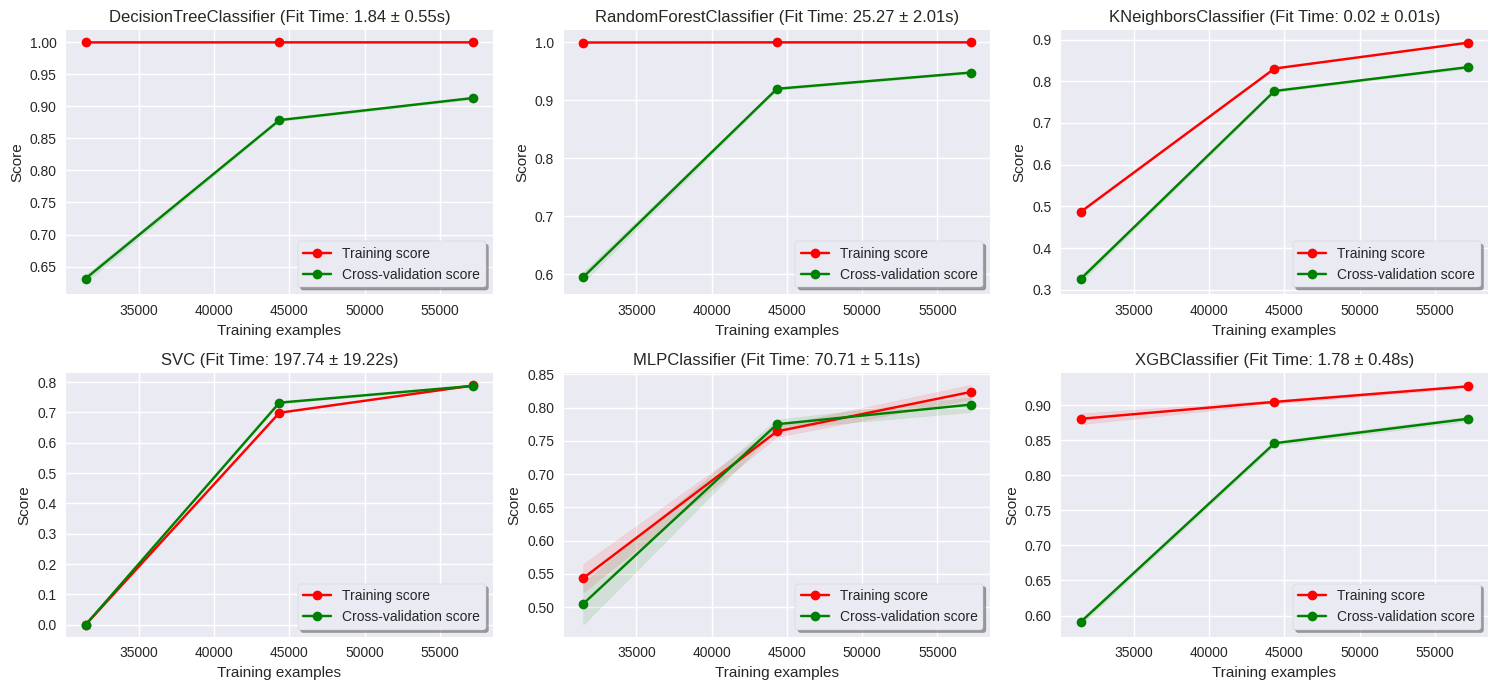

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
cv_results = []

for idx, clf in enumerate(tqdm(classifiers)):
    f1_result = plot_learning_curve(clf, X_train_selected, y_train_smote, ax=axes[idx], cv=5)
    cv_results.append(f1_result)

plt.tight_layout()
plt.show()

In [61]:
cv_results = pd.DataFrame(cv_results).sort_values('mean_test_score', ascending=False, ignore_index=True)
cv_results.to_csv('learning_curve.csv', index=False)
cv_results

,model_name,mean_train_score,mean_test_score,mean_fit_time,std_train_score,std_test_score,std_fit_time
0,RandomForestClassifier,0.999944,0.947844,25.272283,0.000017,0.001561,2.013824
1,DecisionTreeClassifier,0.999944,0.913082,1.839152,0.000017,0.001979,0.552657
2,XGBClassifier,0.926703,0.880494,1.783009,0.002156,0.003482,0.477926
3,KNeighborsClassifier,0.892578,0.833969,0.019677,0.000822,0.003436,0.005849
4,MLPClassifier,0.823531,0.804535,70.706239,0.010784,0.011075,5.108980
5,SVC,0.788716,0.787512,197.740573,0.000819,0.003416,19.223913


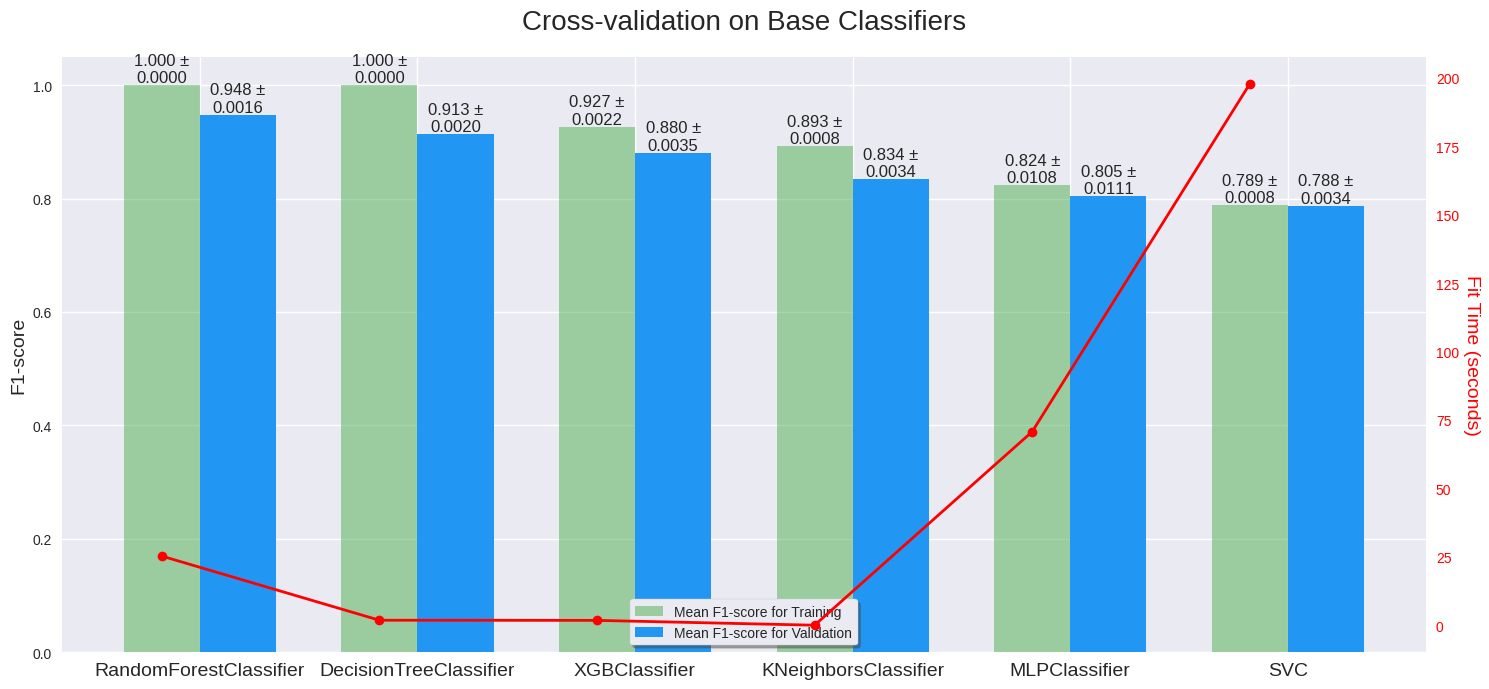

In [62]:
def plot_cv_results(cv_results, title='Cross-validation', bar_width=0.35, fontsize=14, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    index = np.arange(len(cv_results['model_name']))
    train_bars = plt.bar(index, cv_results['mean_train_score'], bar_width, label='Mean F1-score for Training', color='#4CAF50', alpha=0.5)
    test_bars = plt.bar(index + bar_width, cv_results['mean_test_score'], bar_width, label='Mean F1-score for Validation', color='#2196F3')
    plt.title(title, fontsize=fontsize+6, pad=20)
    plt.ylabel('F1-score', fontsize=fontsize)
    plt.xticks(index + bar_width / 2, cv_results['model_name'], ha='center', fontsize=fontsize)
    plt.legend(loc='lower center', frameon=True, shadow=True)

    # Adding the data labels on the bars
    for idx, bars in enumerate((train_bars, test_bars)):
        stds = cv_results['std_test_score'] if idx else cv_results['std_train_score']
        for bar, std in zip(bars, stds):
            f1_mean = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, f1_mean, f'{f1_mean:.3f} ±\n{std:.4f}', fontsize=fontsize-2, va='bottom', ha='center')

    ax2 = plt.gca().twinx() # Adding secondary axis for fit time
    ax2.plot(cv_results['model_name'], cv_results['mean_fit_time'], color='r', marker='o', label='Fit Time Mean (s)', linewidth=2)
    ax2.set_ylabel('Fit Time (seconds)', color='r', fontsize=fontsize, rotation=270, labelpad=15)
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.yaxis.set_label_position('right')
    ax2.grid(False)
    plt.tight_layout()
    plt.show()

plot_cv_results(cv_results, title='Cross-validation on Base Classifiers')

### 2. HalvingRandomSearchCV for Potential Classifiers

In [142]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm
from sklearn.neural_network import MLPClassifier

# Define classifiers with KNN instead of LGBMClassifier
potential_classifiers = {
    'XGBoost': XGBClassifier(),
    'MLPClassifier': MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    # 'DecisionTreeClassifier': DecisionTreeClassifier()

}

# Parameter distributions with options for KNeighborsClassifier
param_distributions = {
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [5, 6],
        'learning_rate': [0.01, 0.1]
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200],
        'class_weight': ['balanced'],
        'max_features': ['sqrt', 'log2']
    },
    }


# Conduct the search for best hyperparameters for each classifier
searchers = {}
for model_name, clf in tqdm(potential_classifiers.items()):
    searchers[model_name] = HalvingRandomSearchCV(
        clf, param_distributions[model_name], resource='n_samples', factor=3, cv=5,
        scoring='f1', return_train_score=True, random_state=42, verbose=3
    ).fit(X_train_selected, y_train_smote)

# Access best parameters and models
for model_name, searcher in searchers.items():
    print(f"{model_name} Best Parameters: {searcher.best_params_}")
    print(f"{model_name} Best Score: {searcher.best_score_}")


  0%|          | 0/3 [00:00<?, ?it/s]

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 8
min_resources_: 20
max_resources_: 71510
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 20
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=0.923, test=0.000) total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=0.833, test=0.800) total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=0.923, test=0.667) total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=0.833, test=0.667) total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=(train=1.000, test=0.667) total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, 

### 3. Best Search Estimators Evaluation

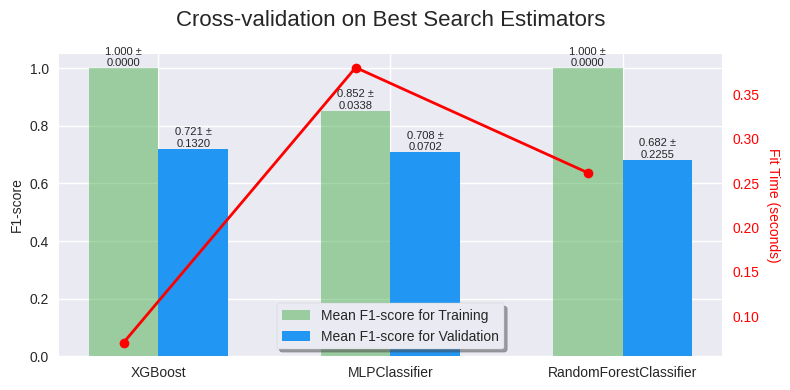

In [149]:
best_estimator_cv_results = []
for model_name, searcher in searchers.items():
    best_cv_result = pd.DataFrame(searcher.cv_results_).iloc[searcher.best_index_].to_dict()
    best_cv_result['model_name'] = model_name
    best_estimator_cv_results.append(best_cv_result)

best_estimator_cv_results = pd.DataFrame(best_estimator_cv_results).to_dict(orient='list')
plot_cv_results(
    best_estimator_cv_results, bar_width=0.3, fontsize=10, figsize=(8, 4),
    title='Cross-validation on Best Search Estimators'
)

The reason why the **mean validation score** and the **mean fit time** look smaller than that in the **initial testing** is that this is just the average result **HalvingRandomSearchCV** performed on small subset of resource, the `n_samples`, for quick candidates filtering. After acquiring the best estimator, it will `refit` on the whole dataset, which is set as default (`refit=True`), leading to the final result.

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
reports, conf_matrices, roc_aucs = {}, {}, {}

for model_name, searcher in searchers.items():
    y_pred = searcher.best_estimator_.predict(X_test_selected)
    y_probs = searcher.best_estimator_.predict_proba(X_test_selected)
    report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1]) # Use [:, 1] for positive class probabilities

    reports[model_name] = pd.DataFrame(report).T
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)
    roc_aucs[model_name] = (fpr, tpr, auc(fpr, tpr))

In [151]:
# Loop through each model's report and print the classification report and best parameters
for model_name, report_df in reports.items():
    print(f"Classification Report for {model_name}\n")
    print(report_df)  # Print the classification report as a DataFrame
    print(f"\nBest settings: {searchers[model_name].best_params_}")
    print("\n" + "=" * 60 + "\n")  # Separator for readability


Classification Report for XGBoost

              precision    recall  f1-score      support
0              0.921954  0.826579  0.871666  3973.000000
1              0.557766  0.757629  0.642514  1147.000000
accuracy       0.811133  0.811133  0.811133     0.811133
macro avg      0.739860  0.792104  0.757090  5120.000000
weighted avg   0.840367  0.811133  0.820330  5120.000000

Best settings: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


Classification Report for MLPClassifier

              precision    recall  f1-score      support
0              0.925904  0.773723  0.843000  3973.000000
1              0.500556  0.785527  0.611469  1147.000000
accuracy       0.776367  0.776367  0.776367     0.776367
macro avg      0.713230  0.779625  0.727235  5120.000000
weighted avg   0.830616  0.776367  0.791132  5120.000000

Best settings: {'solver': 'adam', 'hidden_layer_sizes': (100,), 'activation': 'tanh'}


Classification Report for RandomForestClassifier

              precision

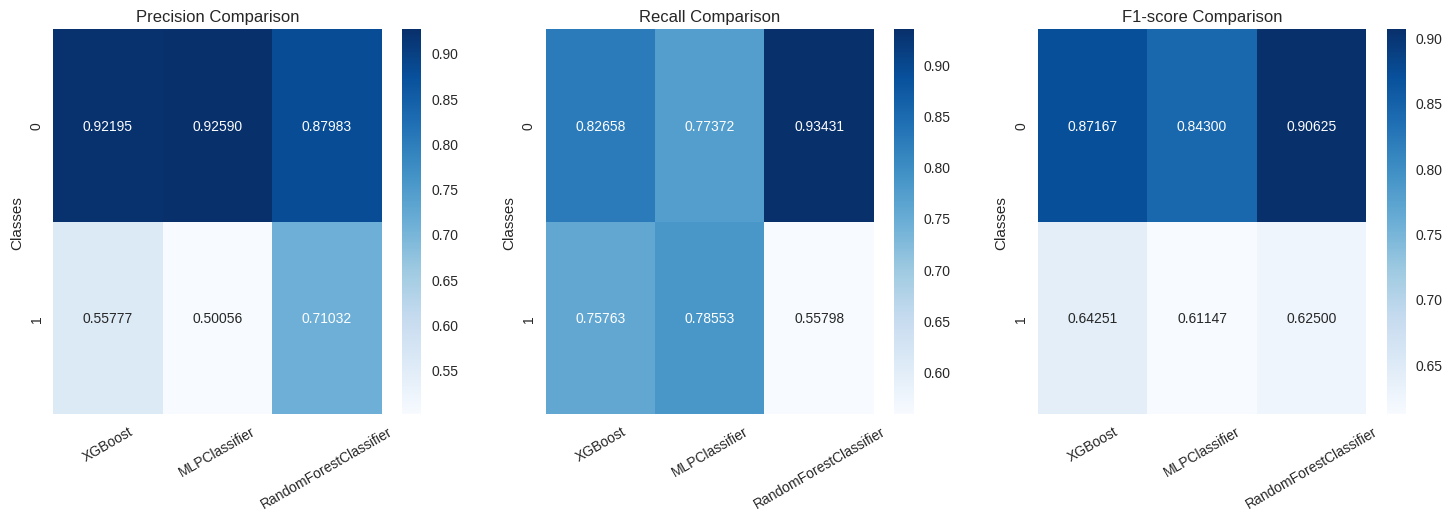

In [152]:
metrics = ['precision', 'recall', 'f1-score']
overall_scores = {metric: pd.DataFrame() for metric in metrics}

for metric in metrics:
    for model_name, report_df in reports.items():
        overall_scores[metric][model_name] = report_df[metric]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
for ax, metric in zip(axes, metrics):
    sns.heatmap(overall_scores[metric].iloc[:-3, :], annot=True, fmt='.5f', cmap='Blues', ax=ax)
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel('Classes')
    for label in ax.get_xticklabels(): label.set_rotation(30)

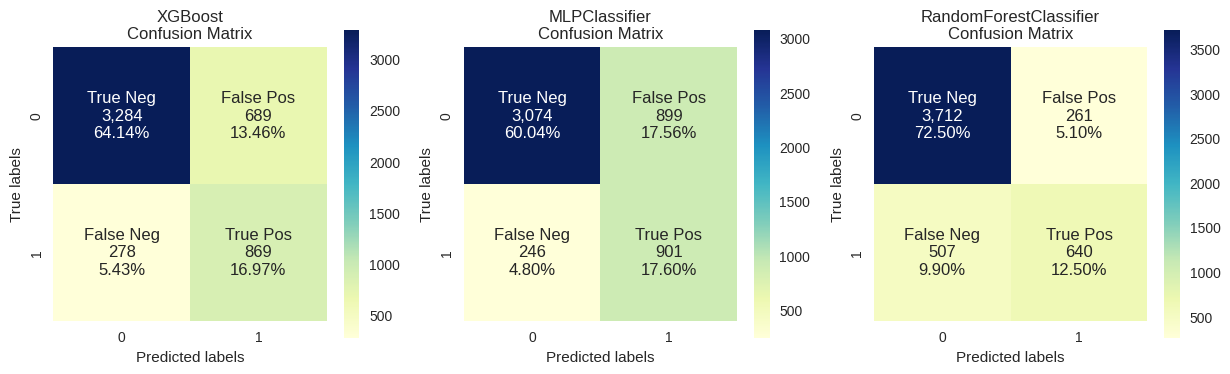

In [153]:
def plot_cf_matrix(cf_matrix, ax=None):
    labels = np.asarray([f'{name}\n{count:,}\n{percent:.2%}' for name, count, percent in zip(
        ['True Neg', 'False Pos', 'False Neg', 'True Pos'], # Group names
        cf_matrix.flatten(), # Group counts
        cf_matrix.flatten() / np.sum(cf_matrix) # Group percentages
    )]).reshape(2, 2)
    sns.heatmap(cf_matrix, fmt='', annot=labels, cmap='YlGnBu', square=True, annot_kws={'size': 12}, ax=ax)

fig, axes = plt.subplots(1, len(searchers), figsize=(5 * len(searchers), 4))
if len(searchers) == 1: axes = [axes] # Make it iterable
for ax, (name, matrix) in zip(axes, conf_matrices.items()):
    plot_cf_matrix(matrix, ax)
    ax.set_title(f'{name}\nConfusion Matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.show()

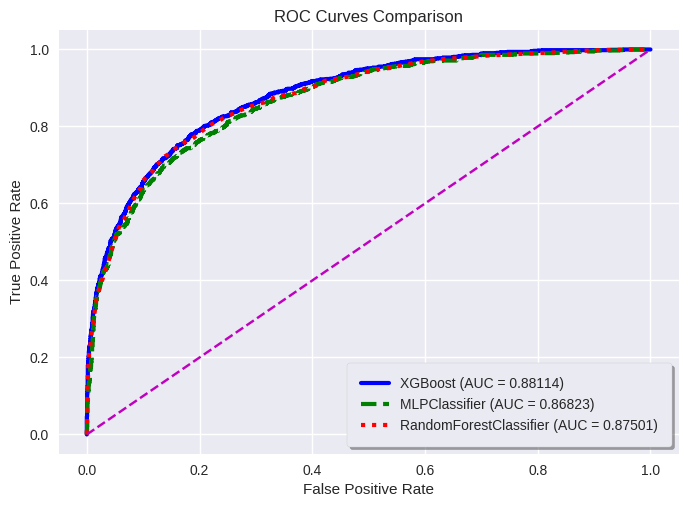

In [154]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.']

for (name, (fpr, tpr, score)), color, linestyle in zip(roc_aucs.items(), colors, linestyles):
    plt.plot(fpr, tpr, label=f'{name} (AUC = {score:.5f})', color=color, linestyle=linestyle, lw=3)

plt.plot([0, 1], [0, 1], 'm--')  # Dashed diagonal
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=True, shadow=True, borderpad=1)
plt.show()

### 4. HalvingRandomSearchCV for Soft Voting

In [155]:
from sklearn.ensemble import VotingClassifier

# Setup Voting Classifier with optimized estimators
optimized_estimators = [(name, searcher.best_estimator_) for name, searcher in searchers.items()]
# Get the number of estimators dynamically
soft_voting_clf = VotingClassifier(estimators=optimized_estimators, voting='soft', n_jobs=-1)

param_grid = {
    'weights': [
        [2, 1, 2],  # Slightly prioritize XGBoost and RandomForest
        [3, 1, 2],  # Give XGBoost a higher weight than the others
        [3, 2, 2],  # Balance between XGBoost and RandomForest with some weight for MLP
        [4, 1, 2],  # Higher priority for XGBoost
        [3, 1, 3]   # Balance with equal weight to XGBoost and RandomForest, with MLP slightly less
    ]
}
voting_searcher = HalvingRandomSearchCV(
    soft_voting_clf, param_grid, resource='n_samples', factor=3, cv=5,
    scoring='f1', return_train_score=True, random_state=42, verbose=3
).fit(X_train_selected, y_train_smote)
best_voting_clf = voting_searcher.best_estimator_

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 8
min_resources_: 20
max_resources_: 71510
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 20
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END weights=[2, 1, 2];, score=(train=1.000, test=0.667) total time=   2.7s
[CV 2/5] END weights=[2, 1, 2];, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END weights=[2, 1, 2];, score=(train=1.000, test=0.800) total time=   0.3s
[CV 4/5] END weights=[2, 1, 2];, score=(train=1.000, test=0.667) total time=   0.3s
[CV 5/5] END weights=[2, 1, 2];, score=(train=1.000, test=0.667) total time=   0.4s
[CV 1/5] END weights=[3, 1, 2];, score=(train=1.000, test=0.667) total time=   0.4s
[CV 2/5] END weights=[3, 1, 2];, score=(train=1.000, test=0.000) total time=   0.4s
[CV 3/5] END weights=[3, 1, 2];, score=(train=1.000, test=0.800) total time=   0.4s
[CV 4/5] END weights=[3, 1, 2];, score=(train=1.000, test=0.667) total

Best Soft Voting Weights: [4, 1, 2]


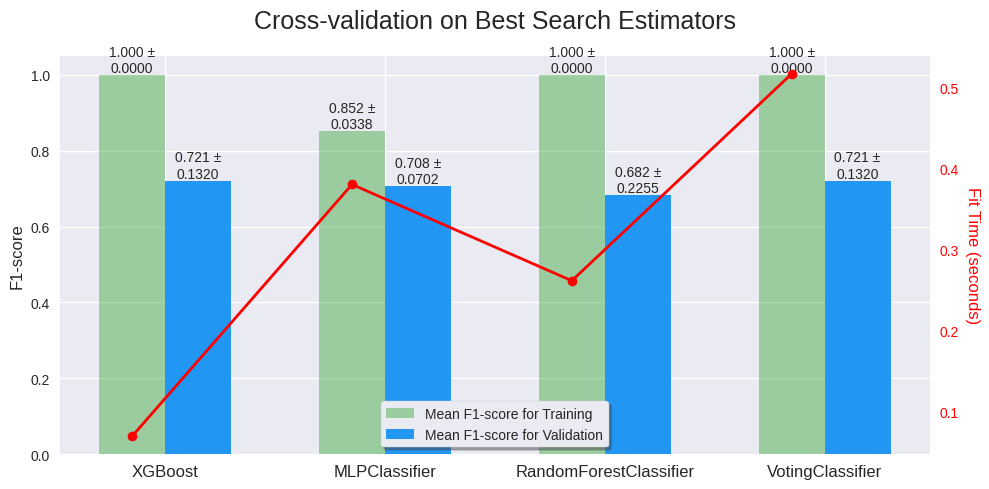

In [156]:
# Print best weights for the Voting Classifier
print('Best Soft Voting Weights:', voting_searcher.best_params_['weights'])

best_cv_results = {key: value[:] for key, value in best_estimator_cv_results.items()}  # Shallow copy of each list in the dictionary

# Get the best Voting Classifier results and add them to `best_cv_results`
best_voting_cv_result = pd.DataFrame(voting_searcher.cv_results_).iloc[voting_searcher.best_index_].to_dict()

# Append the Voting Classifier results to `best_cv_results` in each key
for key in best_cv_results:
    if key in best_voting_cv_result:
        best_cv_results[key].append(best_voting_cv_result[key])

# Add the model name for the Voting Classifier
best_cv_results['model_name'].append('VotingClassifier')

# Visualize the results
plot_cv_results(
    best_cv_results, bar_width=0.3, fontsize=12, figsize=(10, 5),
    title='Cross-validation on Best Search Estimators'
)


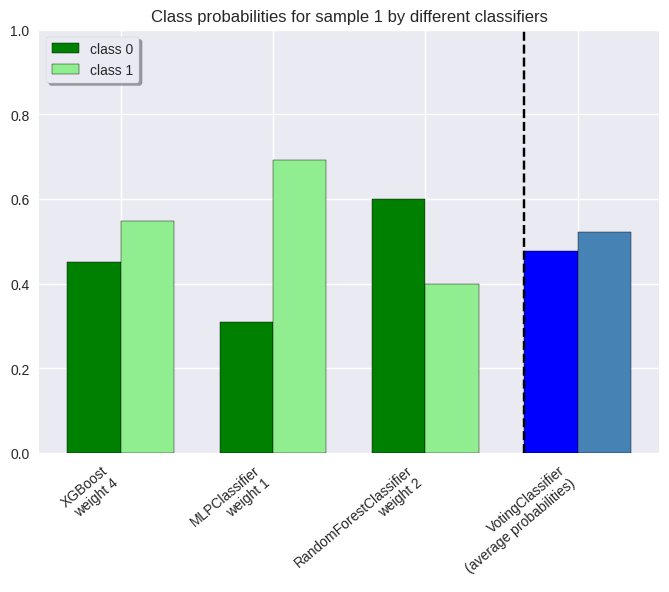

In [157]:
probas = [
    searcher.best_estimator_.predict_proba(X_test_selected) # Predict class probabilities for all classifiers
    for name, searcher in {**searchers, 'VotingClassifier': voting_searcher}.items()
]
class0_0, class1_0 = [pr[0, 0] for pr in probas], [pr[0, 1] for pr in probas] # Get class probabilities for first sample
# Adjusting ind to match the number of classifiers + VotingClassifier (4 in total)
ind, width = np.arange(len(probas)), 0.35  # Group positions & Bar Width

# Adjusting bar plotting to handle the correct number of bars
p1 = plt.bar(ind[:-1], class0_0[:-1], width, color='green', edgecolor='k')  # Bars for classifier 1-3
p2 = plt.bar(ind[:-1] + width, class1_0[:-1], width, color='lightgreen', edgecolor='k')
p3 = plt.bar(ind[-1], class0_0[-1], width, color='blue', edgecolor='k')  # Bar for VotingClassifier
p4 = plt.bar(ind[-1] + width, class1_0[-1], width, color='steelblue', edgecolor='k')

plt.axvline(ind[-1] - 0.5 * width, color='k', linestyle='dashed') # Adjusting the separator line position

# Adjusting x-ticks to match the adjusted bar positions
plt.xticks(ind + width / 2, [*[
    f'{name}\nweight {weight}' for name, weight in zip(searchers, voting_searcher.best_params_['weights'])],
    'VotingClassifier\n(average probabilities)' # Plot annotations
], rotation=40, ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 0', 'class 1'], loc='upper left', frameon=True, shadow=True)
plt.show()

### 5. Best Model Evaluation

In [158]:
print('Accuracy on the Test Set:', best_voting_clf.score(X_test_selected, y_test))
y_pred = best_voting_clf.predict(X_test_selected)
y_probs = best_voting_clf.predict_proba(X_test_selected)

# # Get prediction probabilities and apply a custom threshold
# custom_threshold = 0.45  # Experiment with values like 0.45, 0.5, etc.
# y_probs = best_voting_clf.predict_proba(X_test_selected)[:, 1]
# y_pred_custom = (y_probs >= custom_threshold).astype(int)

# # Evaluate with custom threshold
# from sklearn.metrics import classification_report, confusion_matrix
# print("Classification Report with Custom Threshold:")
# print(classification_report(y_test, y_pred_custom))
# print("Confusion Matrix with Custom Threshold:")
# print(confusion_matrix(y_test, y_pred_custom))

pd.concat([
    pd.DataFrame({ 'Actual': y_test, 'Pred': y_pred }),
    pd.DataFrame(y_probs, columns=['A Probability', 'B Probability']),
], axis=1).head()

Accuracy on the Test Set: 0.831640625


,Actual,Pred,A Probability,B Probability
49333,1.0,1.0,NaN,NaN
44767,1.0,1.0,NaN,NaN
35900,0.0,0.0,NaN,NaN
40263,0.0,1.0,NaN,NaN
15470,0.0,0.0,NaN,NaN


              precision    recall  f1-score   support

           0    0.91691   0.86106   0.88811      3973
           1    0.60259   0.72973   0.66009      1147

    accuracy                        0.83164      5120
   macro avg    0.75975   0.79540   0.77410      5120
weighted avg    0.84650   0.83164   0.83703      5120



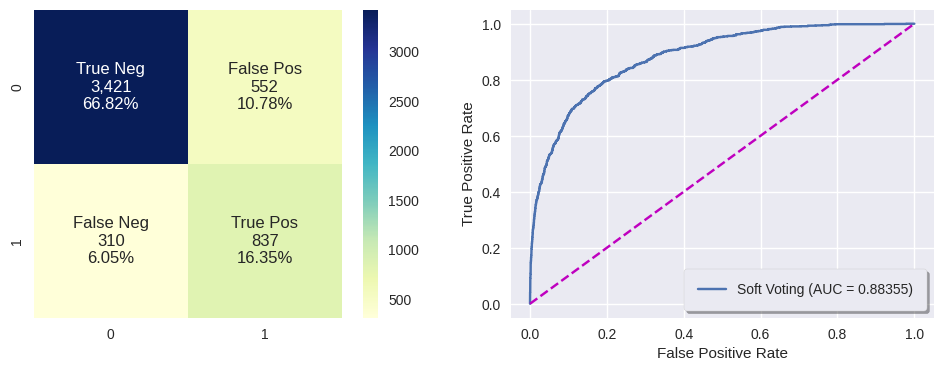

In [159]:
print(classification_report(y_test, y_pred, digits=5))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_cf_matrix(confusion_matrix(y_test, y_pred))

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f'Soft Voting (AUC = {auc(fpr, tpr):.5f})')
plt.plot([0, 1], [0, 1], 'm--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=True, shadow=True, borderpad=1)
plt.show()

## D. Prediction

In [160]:
data_unknown = pd.read_csv('Assignment3-UnknownData.csv', na_values=missing_values)
data_unknown.set_index('row ID', inplace=True)
# data_unknown = data_unknown.drop(['Location'], axis=1)
data_unknown

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No
Row1,Albury,19.7,27.2,0.0,NaN,NaN,WNW,46.0,NW,WSW,...,30.0,49.0,22.0,1004.8,1004.2,NaN,NaN,21.6,26.1,No
Row2,Albury,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No
Row3,Albury,14.9,27.3,0.0,NaN,NaN,SSE,41.0,SSE,SE,...,13.0,50.0,30.0,1011.6,1008.5,NaN,1.0,17.4,25.8,No
Row4,Albury,13.2,31.9,0.0,NaN,NaN,NNW,35.0,S,ENE,...,9.0,53.0,25.0,1014.1,1011.6,NaN,NaN,18.0,29.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Row9960,Uluru,25.6,40.6,0.2,NaN,NaN,ENE,56.0,NaN,N,...,11.0,47.0,27.0,1007.3,1003.2,NaN,1.0,32.0,38.6,No
Row9961,Uluru,15.9,38.2,0.0,NaN,NaN,SSE,37.0,E,SSE,...,19.0,15.0,8.0,1012.5,1008.8,NaN,NaN,28.3,37.8,No
Row9962,Uluru,17.5,39.7,0.0,NaN,NaN,SSW,48.0,S,NNE,...,11.0,22.0,9.0,1009.5,1005.6,NaN,NaN,26.9,38.6,No


In [161]:
# # Impute missing categorical values with mode
for col in categorical_columns:
    data_unknown[col].fillna(data_unknown[col].mode()[0], inplace=True)

# Encode categorical columns
for col in categorical_columns:
    data_unknown[col] = label_encoder.fit_transform(data_unknown[col])

data_unknown[numerical] = mice_imputer.fit_transform(data_unknown[numerical])

# Dealing with outliers
data_unknown, outliers_summary = winsorize_outliers(data_unknown, limits=[0.05, 0.05])

# Apply the same scaling
data_unknown[robust_cols] = robust_scaler.transform(data_unknown[robust_cols])
data_unknown[standard_cols] = standard_scaler.transform(data_unknown[standard_cols])

# Select only features selected by RFE
data_unknown = data_unknown[selected_features_rfe]

data_unknown.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
row ID,,,,,,,,,,,,,,,
Row0,2,0.328435,1.097931,-0.477328,1.282537,1.075488,1.110616,-1.020190,-1.678158,-1.189587,-1.435585,-0.758962,-0.911134,0.608206,1.252133
Row1,2,1.174224,0.717074,-0.516475,1.663113,1.054582,0.339494,-1.368659,-1.726369,-1.620187,-1.595785,-0.248076,-0.956944,0.773398,0.816422
Row2,2,1.505905,1.966285,-0.516475,2.009333,1.118220,-0.311125,-1.136347,-1.533527,-1.253380,-1.547725,-0.686050,-0.916918,1.417650,2.014628
Row3,2,0.378187,0.732308,-0.516475,1.361962,1.170607,-0.046067,-1.310581,-1.340685,-0.806832,-0.938965,-0.998702,-1.758383,0.079589,0.769738
Row4,2,0.096258,1.433085,-0.516475,1.455829,1.184019,-0.508740,-1.136347,-1.581737,-0.408128,-0.442346,-0.998397,-1.027287,0.178704,1.392183


In [162]:
# Make prediction
y_pred_unknown = best_voting_clf.predict(data_unknown)

# Create DataFrame with original index and predictions
predictions_df = pd.DataFrame({
    'row ID': data_unknown.index,  # Use the stored index
    'Predict-RainTomorrow': y_pred_unknown
})
predictions_df.to_csv('predictions.csv', index=False)